## Knots with bridges between antipode nodes

Let's see the roots of the unit circle:

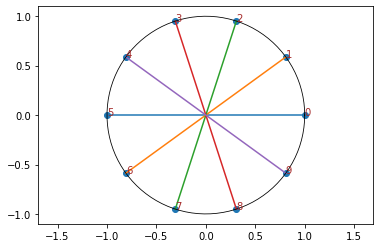

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 10

#Nodes
r = np.linspace(0, (2*np.pi - 2*np.pi/n), n)
plt.scatter(np.cos(r), np.sin(r))
for j in range(n):
    plt.text(np.cos(r)[j], np.sin(r)[j], j, c='brown')

lines = [[i, (n//2 + i)] for i in range(n//2) ]
x = []
for i in lines:
    plt.plot(np.cos(r)[i],np.sin(r)[i])
    
#Circle
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), 'k', lw=0.8)
plt.yticks(np.linspace(-1,1,5))
plt.axis('equal');

Let's try first with Lissajous knots:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def Lissajous(n,nx,ny,nz,φx=1,φy=1,φz=1,tf=2*np.pi):
    t = np.linspace(0, tf, 500)      #Knot
    r = np.linspace(0, 2*np.pi, n+1) #Nodes
    x,y,z = np.cos(nx*t + φx), np.cos(ny*t + φy), np.cos(nz*t + φz)
    a,b,c = np.cos(nx*r + φx), np.cos(ny*r + φy), np.cos(nz*r + φz)

    #Indexes for antipodes
    lines = [[i, i + n//2] for i in range(n//2) ]

    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=3, color='brown'))]

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=3)))

    fig = go.Figure(data=knot)
    fig.show()

In [24]:
Lissajous(10,1,3,5)

In [28]:
Lissajous(10,3,5,1,0.1,0.7,1)

In [26]:
Lissajous(100,3,5,1,0.1,0.7,1)

So, first thing we find is that there must be a 2 in one of the frequencies in order to avoid the intersection at the center

In [30]:
Lissajous(10,2,3,5)

In [34]:
Lissajous(300,2,3,5)

But then we find that we can take nodes out of phase in order to avoid the intersection at the center, so we don't need a 2 in one of the frequencies

## Nodes out of phase

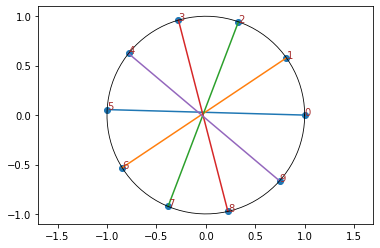

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import random

n = 10

#Nodes
# r = np.linspace(0, (2*np.pi - 2*np.pi/n), n) #Symmetric nodes
r = np.linspace(0, (2*np.pi - 2*np.pi/n) - 0.1, n) #Out of phase nodes
# r = np.sort( np.array( random.sample( range(2*n), n) )*(2*np.pi/(2*n)) ) #Random nodes
plt.scatter(np.cos(r), np.sin(r))
for j in range(len(r)):
    plt.text(np.cos(r)[j], np.sin(r)[j], j, c='brown')

lines = [[i, (len(r)//2 + i)] for i in range(len(r)//2) ]
x = []
for i in lines:
    plt.plot(np.cos(r)[i],np.sin(r)[i])
    
#Circle
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), 'k', lw=0.8)
plt.yticks(np.linspace(-1,1,5))
plt.axis('equal');

Adding some extra bridges:

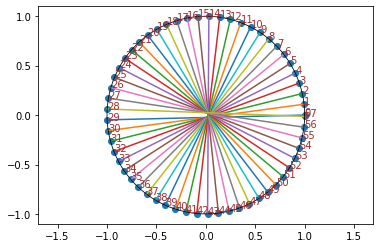

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import random

n = 300

#Nodes
# r = np.linspace(0, (2*np.pi - 2*np.pi/n), n)
r = np.arange(0, 2*np.pi, 3/n+0.1)
plt.scatter(np.cos(r), np.sin(r))
for j in range(len(r)):
    plt.text(np.cos(r)[j], np.sin(r)[j], j, c='brown')

lines = [[i, (len(r)//2 + i)] for i in range(len(r)//2) ]
x = []
for i in lines:
    plt.plot(np.cos(r)[i],np.sin(r)[i])
    
#Circle
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), 'k', lw=0.8)
plt.yticks(np.linspace(-1,1,5))
plt.axis('equal');

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random

def Lissajous_out_of_phase(n,nx,ny,nz,φx=1,φy=1,φz=1,tf=2*np.pi):
    t = np.linspace(0, tf, 500)
    r = np.linspace(0, (2*np.pi - 2*np.pi/n) - 0.1, n) #Nodes out of phase by 0.1
    # the range in the r array has to be of length greater than n so that there is room for the random values, 
    # otherwise if length(r) == n, then we have again the symmetric case
    x,y,z = np.cos(nx*t + φx), np.cos(ny*t + φy), np.cos(nz*t + φz) #Knot
    a,b,c = np.cos(nx*r + φx), np.cos(ny*r + φy), np.cos(nz*r + φz) #Nodes
   
    #Indexes for antipodes
    lines = [[i, i + len(r)//2] for i in range(len(r)//2) ]
    
    #Knot
    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=3, color='brown'))]

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=3)))
    fig = go.Figure(data=knot)
    fig.show()

In [43]:
Lissajous_out_of_phase(10,1,3,5)

In [45]:
Lissajous_out_of_phase(10,3,5,1,0.1,0.7,1)

This works even better with random nodes

## Random nodes

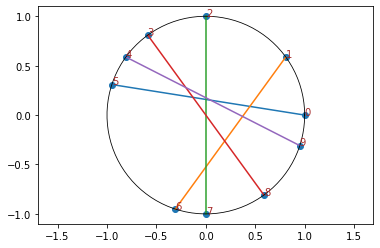

In [240]:
import random

n = 10

#Nodes
# r = np.linspace(0, (2*np.pi - 2*np.pi/n), n) #Symmetric nodes
# r = np.linspace(0, (2*np.pi - 2*np.pi/n) - 0.1, n) #Out of phase nodes
r = np.sort( np.array( random.sample( range(2*n), n) )*(2*np.pi/(2*n)) ) #Random nodes
plt.scatter(np.cos(r), np.sin(r))
for j in range(len(r)):
    plt.text(np.cos(r)[j], np.sin(r)[j], j, c='brown')

lines = [[i, (len(r)//2 + i)] for i in range(len(r)//2) ]
x = []
for i in lines:
    plt.plot(np.cos(r)[i],np.sin(r)[i])
    
#Circle
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), 'k', lw=0.8)
plt.yticks(np.linspace(-1,1,5))
plt.axis('equal');

In [97]:
random.sample( range(5), 5)

[4, 1, 0, 3, 2]

A random sample with size $n$ and range $n$, i.e. the same length as the range, is limited to $n!$ permutations

In [75]:
import math
math.factorial(5)

120

In [99]:
from itertools import permutations
 
# Get all permutations
perm = permutations(range(5), 5)
 
# Print the obtained permutations
c = 0
for i in list(perm):
#     print(i)
    c += 1
c

120

In [171]:
random.sample( range(10), 5)

[1, 8, 0, 2, 3]

But a random sample with the range length twice the size has $(2n)!/n!$ permutations

In [103]:
math.factorial(10)/math.factorial(5)

30240.0

In [96]:
from itertools import permutations
 
# Get all permutations
perm = permutations(range(10), 5)
 
# Print the obtained permutations
c = 0
for i in list(perm):
#     print(i)
    c += 1
c

30240

So we'll use a `random.sample( range(2*n), n)` normalized array in order to have some diversity

In [104]:
n = 10
np.sort( np.array( random.sample( range(2*n), n) )*(2*np.pi/(2*n)) ) #2*n could be from n+1 up to an arbitrarily big number

array([0.31415927, 0.62831853, 2.51327412, 3.45575192, 3.76991118,
       4.39822972, 4.71238898, 5.02654825, 5.34070751, 5.65486678])

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random

def Lissajous_rnd_nodes(n,nx,ny,nz,φx=1,φy=1,φz=1,tf=2*np.pi):
    t = np.linspace(0, tf, 500)
    r = np.sort( np.array( random.sample( range(2*n), n) )*(2*np.pi/(2*n)) ) #Random nodes
    # the range in the r array has to be of length greater than n so that there is room for the random values, 
    # otherwise if length(r) == n, then we have again the symmetric case
    x,y,z = np.cos(nx*t + φx), np.cos(ny*t + φy), np.cos(nz*t + φz) #Knot
    a,b,c = np.cos(nx*r + φx), np.cos(ny*r + φy), np.cos(nz*r + φz) #Nodes
   
    #Indexes for antipodes
    lines = [[i, i + len(r)//2] for i in range(len(r)//2) ]
    
    #Circle
    xc, yc = np.cos(r), np.sin(r)
    circle = [go.Scatter(x=np.cos(t), y=np.sin(t), line=dict(width=2, color='brown'))]
    #Circle bars                               
    for m in lines:
        circle.append( go.Scatter( x = [ xc[m[0]], xc[m[1]] ], y = [ yc[m[0]], yc[m[1]] ], 
                                   line = dict(width=2), marker=dict(size=9)) )
    fig = go.Figure(data=circle)
    fig.update_yaxes(scaleanchor = 'x', scaleratio = 1)
    fig.show()

    #Knot
    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=3, color='brown'))]

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=3)))
    fig = go.Figure(data=knot)
    fig.show()

In [107]:
for i in range(2,7,2):
    Lissajous_rnd_nodes(10,3,5,1,i,2*i,3*i)

In [108]:
Lissajous_rnd_nodes(10,3,5,1,0.1,0.7,1)

In [104]:
Lissajous(10,3,5,1,0.1,0.7,1)

In [116]:
Lissajous_rnd_nodes(10,2,3,5)

In [113]:
Lissajous(10,2,3,5)

In [68]:
Lissajous_rnd_nodes(10,2,3,5)

In [125]:
Lissajous_rnd_nodes(10,11,5,7,0,np.pi/4,np.pi/12)

In [113]:
def Lissajous_thick(n,nx,ny,nz,φx=1,φy=1,φz=1,tf=2*np.pi):
    t = np.linspace(0, tf, 500)      #Knot
#     r = np.linspace(0, 2*np.pi, n+1) #Nodes evenly distributed
    r = np.arange(0, 2*np.pi, 3/n+0.1) #Nodes out of phase
    x,y,z = np.cos(nx*t + φx), np.cos(ny*t + φy), np.cos(nz*t + φz)
    a,b,c = np.cos(nx*r + φx), np.cos(ny*r + φy), np.cos(nz*r + φz)

    #Indexes for antipodes
    lines = [[i, i + n//2] for i in range(n//2) ]

    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=30, color='brown'))]

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=30)))

    fig = go.Figure(data=knot)
    fig.show()

In [120]:
Lissajous_thick(12,2,3,5)

## Now we try with random knots

**Fourier model**. Consider a smooth emmbedding of $S^{1}$ into $R^{3}$. Denote the coordinate functions by $x(t)$, $y(t)$, and $z(t)$. These smooth coordinate functions may be approximated by fourier series. Conversely we can generate coordinate functions that determine a knot, and choosing the Fourier coefficients randomly gives a model of random knots that are already smoothly embedded. In this context a Fourier $(i,j,k)-$knot is defined by the coorinates functions:

\begin{align}
x(t) = &\ A_{x,1}\cos(n_{x,1}t + \phi_{x,1}) + \cdots + A_{x,i} \cos(n_{x,i}t + \phi_{x,i}) \\
y(t) = &\ A_{y,1}\cos(n_{y,1}t + \phi_{y,1})\ + \cdots + A_{y,j} \cos(n_{y,j}t + \phi_{y,j}) \\
z(t) = &\ A_{z,1}\cos(n_{z,1}t + \phi_{z,1})\ + \cdots + A_{z,k} \cos(n_{z,k}t + \phi_{z,k}) \\
\end{align}

In [125]:
import plotly.express as px

def coefs(i,j,k,m=10): #m is the maximum random integer
    Cx = [[x for x in np.random.randint(0,m,3)] for ix in range(i)] #Ax, nx, ϕx
    Cy = [[x for x in np.random.randint(0,m,3)] for jy in range(j)] #Ay, ny, ϕy
    Cz = [[x for x in np.random.randint(0,m,3)] for kz in range(k)] #Az, nz, ϕz
    return Cx,Cy,Cz
    
def Fourier_knot(ts, cs):
    pts = []
    for t in ts:
        pts.append( sum([ c[0]*np.cos( c[1]*t + c[2] ) for c in cs ] ) )
    return pts

def random_knots(n,i,j,k,m=10,p=10): #n is the number of nodes
    
    #Knot
    C = coefs(i,j,k,m)
    t = np.linspace(0,p,1000)
    x = Fourier_knot(t, C[0])
    y = Fourier_knot(t, C[1])
    z = Fourier_knot(t, C[2])
    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=3, color='brown'))]
    
    #Nodes
#     r = np.linspace(0, 2*np.pi, n+1)   #nodes evenly distributed
    r = np.arange(0, 6*np.pi, 3/n + 0.1) #nodes out of phase
    a = Fourier_knot(r, C[0])
    b = Fourier_knot(r, C[1])
    c = Fourier_knot(r, C[2])
    
    #Array of indexes for antipodes
    lines = [[i, i + n//2] for i in range(n//2) ]

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=3)))

    fig = go.Figure(data=knot)
    fig.show()

#     fig = px.line_3d(x=x, y=y, z=z)
#     fig.show()

In [128]:
for i in range(2,7,2):
    random_knots(10,3,5,5+i)

In [41]:
random_knots(8,1,1,1,20)

In [46]:
random_knots(20,1,2,3,20)

In [45]:
random_knots(10,1,2,3,20)

In [49]:
random_knots(100,1,2,3)

In [51]:
random_knots(300,1,2,3)

In [61]:
random_knots(300,1,2,3)

In [101]:
random_knots(158,1,2,3)